# Importing the required files


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the csv data

In [43]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Delete a column

In [44]:
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Displaying stats about data

In [45]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


To get basic info about datatypes

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


To display no. of samples on each class

In [47]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Preprocessing the dataset

Checking for null values

In [48]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

Histogram

<AxesSubplot:>

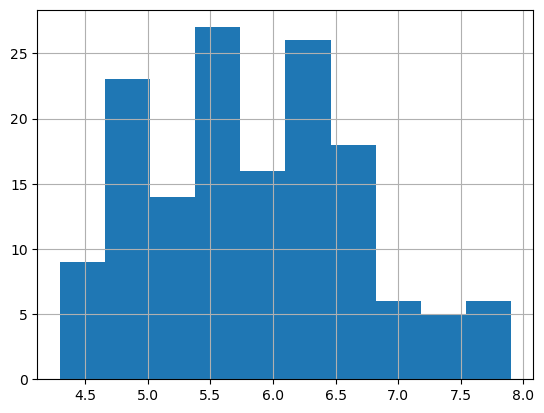

In [49]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

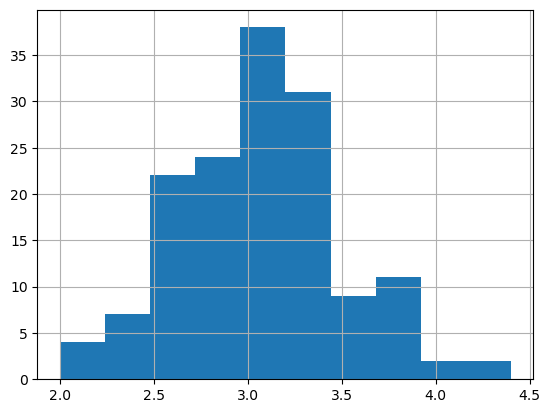

In [50]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

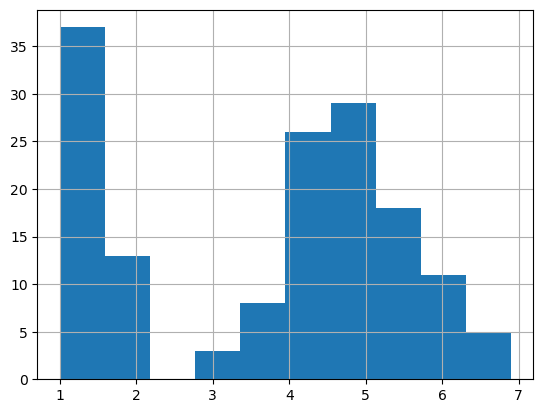

In [51]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

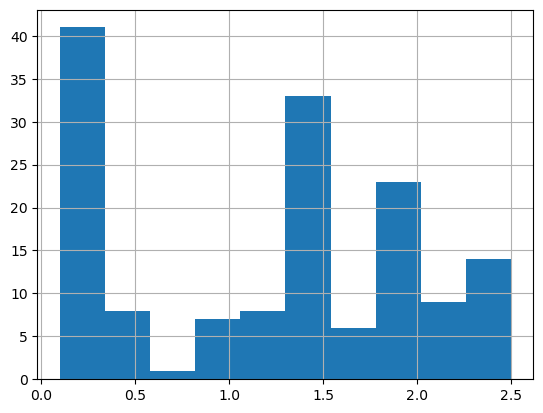

In [52]:
df['PetalWidthCm'].hist()

Creating list of colors and class labels

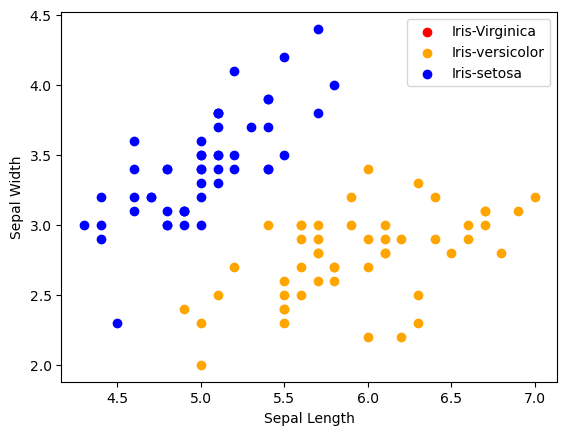

In [53]:
colors = ['red', 'orange', 'blue']
species = ['Iris-Virginica', 'Iris-versicolor', 'Iris-setosa']

for i in range(3):
    # filter data on each class
    x = df[df['Species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], 
                label = species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.legend()

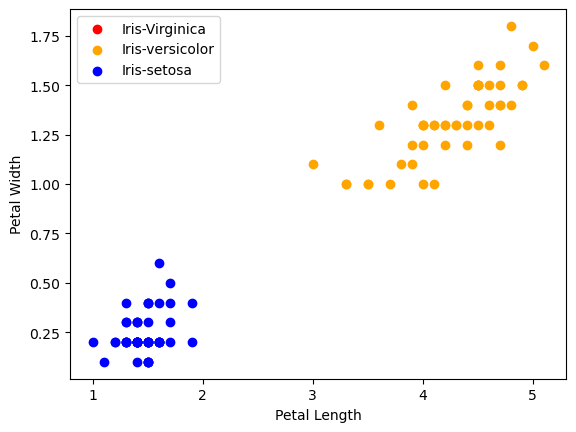

In [54]:
for i in range(3):
    # filter data on each class
    x = df[df['Species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], 
               label = species[i])
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.legend()

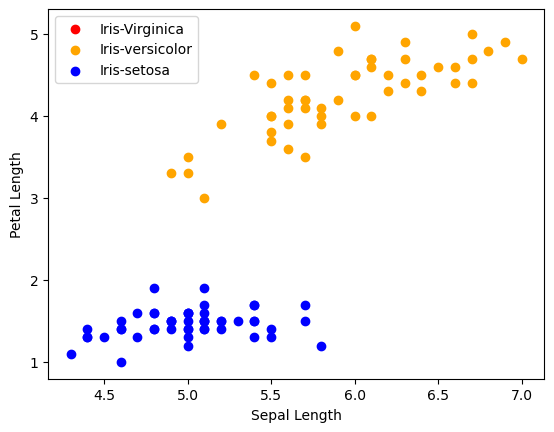

In [55]:
for i in range(3):
    # filter data on each class
    x = df[df['Species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], 
               label = species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Petal Length")
    plt.legend()

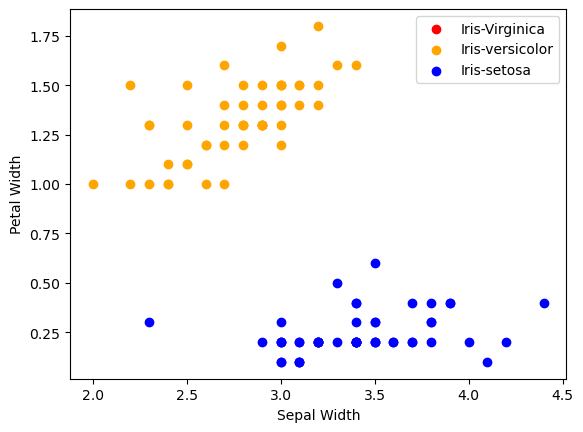

In [56]:
for i in range(3):
    # filter data on each class
    x = df[df['Species'] == species[i]]
    # plot the scatter plot
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], 
               label = species[i])
    plt.xlabel("Sepal Width")
    plt.ylabel("Petal Width")
    plt.legend()

# Correlation Matrix

Display the correlation matrix

In [57]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

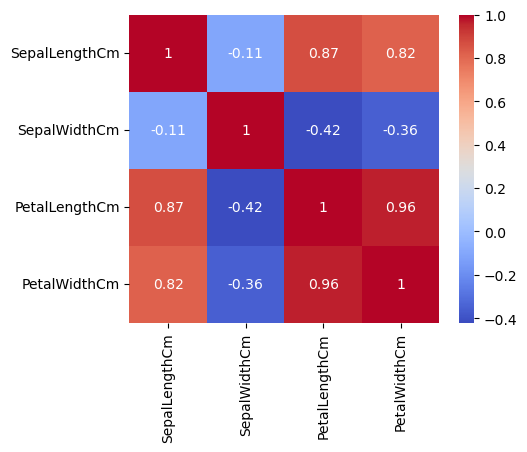

In [58]:
corr = df.corr()
#plot the heat map
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot = True, ax = ax, cmap = 'coolwarm')

# Label Encoder

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#transform the string labels to integer
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training and Testing

In [60]:
from sklearn.model_selection import train_test_split
## train - 70%
## test - 30%

#input data
X = df.drop(columns = ['Species'])

#output data
Y = df['Species']

#split the dataset for train test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [61]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [62]:
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [63]:
# print metric to get performance
print("Accuracy: " , model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [64]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [65]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [66]:
#print metric to get performance
print("Accuracy: " , model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [67]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [68]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [69]:
#print metric to get performance
print("Accuracy: ", model.score(x_train, y_train) * 100)

Accuracy:  100.0
